In [ ]:
#211P011
#support vector machine using python sklearn iris dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df["target"]=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df[df["target"]==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df[df["target"]==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [ ]:
df["flower_name"]=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


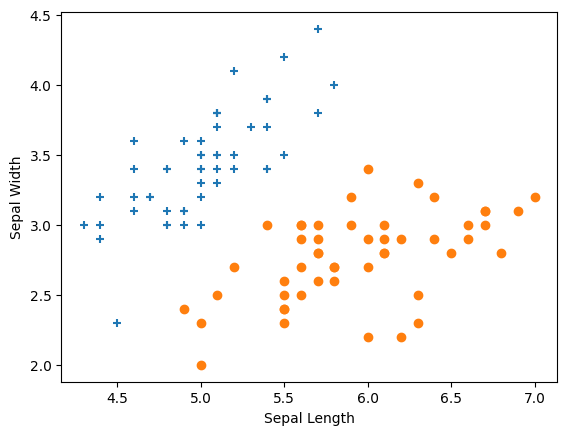

In [ ]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],marker="+")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"])

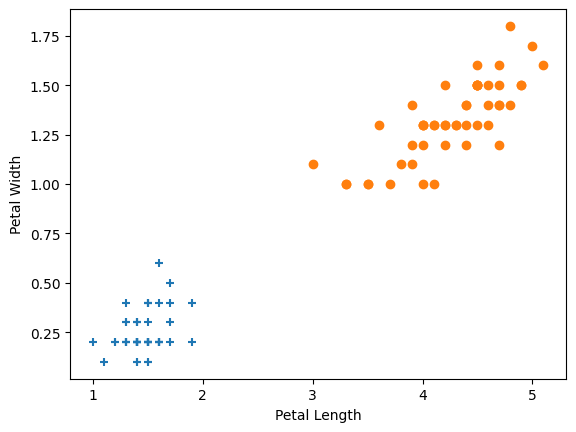

In [ ]:
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],marker="+")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"])

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(["target","flower_name"],axis="columns")
y=df.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
model.score(x_test,y_test)

0.9666666666666667

In [ ]:
#creating gui using ipywidgets
import ipywidgets as widgets
from IPython.display import display
def on_predict_button_clicked(b):
    with output:
        output.clear_output()
        input_data = np.array([[sepal_length.value, sepal_width.value, petal_length.value, petal_width.value]])
        prediction = model.predict(input_data)
        if prediction[0] == 0:
            prdiction_label.value = "Prediction: Setosa"
        elif prediction[0] == 1:
            prdiction_label.value = "Prediction: Versicolor"
        else:
            prdiction_label.value = "Prediction: Virginica"

header=widgets.HTML("<h3>Iris Flower Classification</h3>")
footer=widgets.HTML("<p>© 211P011 - Support Vector Machine</p>")
sepal_length = widgets.FloatText(description="Sepal Length:")
sepal_width = widgets.FloatText(description="Sepal Width:")
petal_length = widgets.FloatText(description="Petal Length:")
petal_width = widgets.FloatText(description="Petal Width:")

predict_button = widgets.Button(description="Predict")
output = widgets.Output()

predict_button.on_click(on_predict_button_clicked)

prdiction_label = widgets.Label(value="Prediction:")

vbox = widgets.VBox([
    header,
    sepal_length,
    sepal_width,
    petal_length,
    petal_width,
    predict_button,
    prdiction_label,
    output,
    footer
])
# Display the GUI
display(vbox)